# Lucky and Unlucky Games
We will graph and compare a lucky win; A win where you score under the week's mean. And an unlucky loss; a loss where you score over the week's mean.

In [5]:
import math
import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv

load_dotenv()
current_year = int(os.getenv('current_year'))
full_games = pd.read_csv("processed_games.csv")

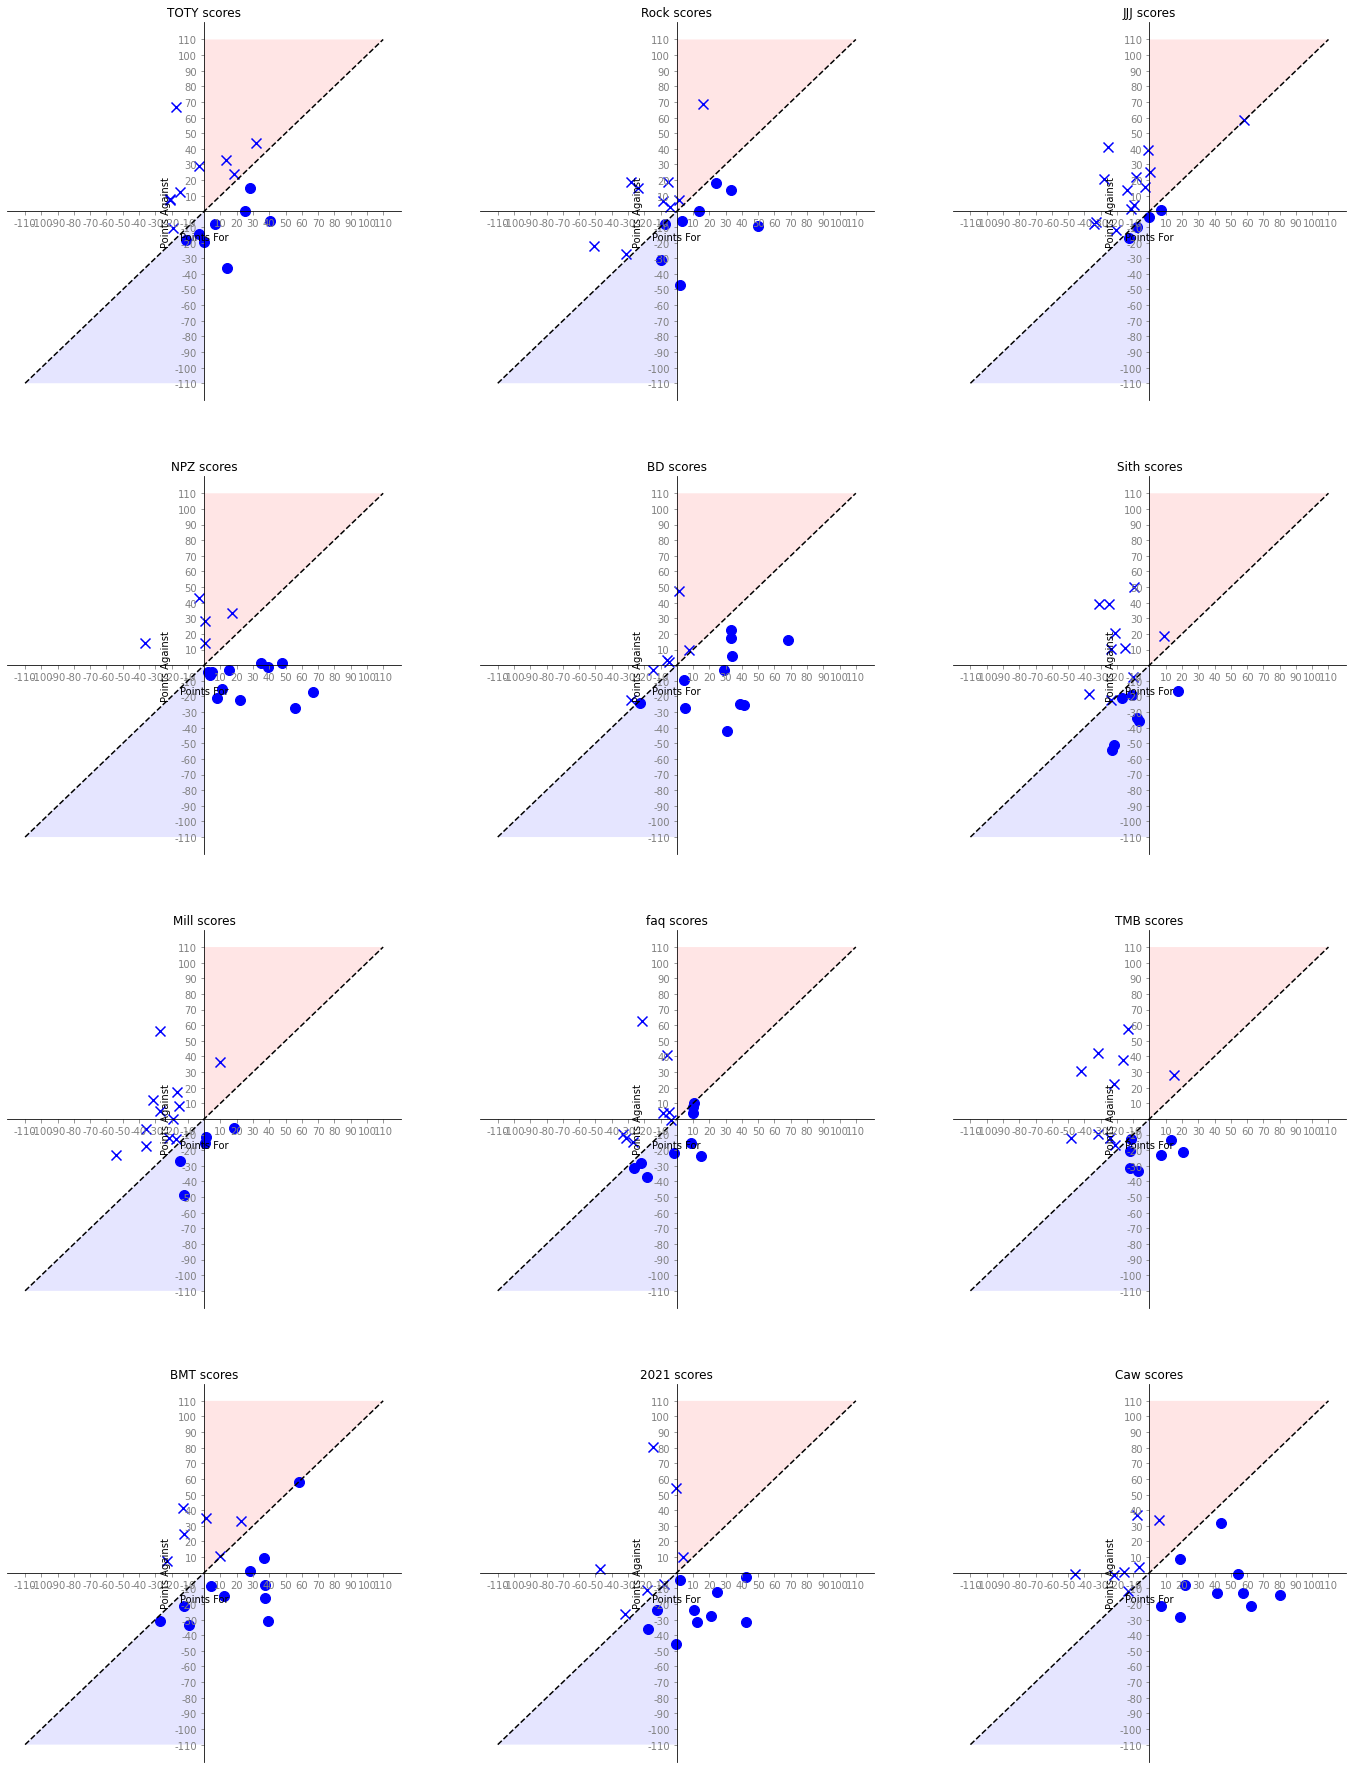

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(24,32))

z = 110

def build_plot(ax, data):
    ax.fill_between([-z,0], -z, [-z,0], facecolor='b', alpha=0.1)
    ax.fill_between([0,z], [0,z], z, facecolor='r', alpha=0.1)

    ax.scatter(data=data.query('win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='o',
            label='Win')
    ax.scatter(data=data.query('not win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='x',
            label='Loss')
    ax.plot([-z,z],[-z,z], 'k--')

    ax.set_xlabel('Points For')
    ax.set_ylabel('Points Against')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    tx = list(range(-z,z+1,10))
    tx.remove(0)
    ax.yaxis.set(ticks=tx, ticklabels=tx)
    ax.xaxis.set(ticks=tx, ticklabels=tx)

    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    
    ax.set(title='{} scores'.format(data["abbrev"].iloc[0]))

cur_teams = full_games.loc[full_games["year"] == current_year]
for idx, x in enumerate(cur_teams["id"].unique()):
    row = math.trunc(idx/3)
    col = idx - (row * 3)
    build_plot(ax[row][col], cur_teams.loc[cur_teams["id"] == x])
